In [ ]:
# Instalar DiCE
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Cargar el archivo CSV en un DataFrame
dataset = pd.read_csv('/content/drive/MyDrive/TFM_CRC_MICROBIOME.csv')

print(dataset.head())

   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_H  \
0                                           0.637630                                                
1                                           0.237705                                                
2                                           0.038784                                                
3                                           0.004594                                                
4                                           0.025618                                                

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales_A_737866;f__Enterobacteriaceae_A;g__Klebsiella_724518  \
0                                           0.307338                                                                                
1                       

In [ ]:
# Crear una lista de columnas a eliminar
columnas_a_eliminar = []

# Procesar cada columna excepto la primera y las dos últimas
for columna in dataset.columns[1:-2]:
    # Separar la columna por punto y coma
    separados = columna.split(';')

    # Verificar si se obtienen exactamente 6 nombres
    if len(separados) == 6:
        # Renombrar la columna con el último de los nombres
        nuevo_nombre = separados[-1]
        dataset = dataset.rename(columns={columna: nuevo_nombre})
    else:
        # Agregar a la lista de columnas a eliminar
        columnas_a_eliminar.append(columna)

# Eliminar las columnas que no cumplen con la condición
dataset = dataset.drop(columns=columnas_a_eliminar)

# Mostrar el dataframe procesado
print(dataset)

      Unnamed: 0  g__Bacteroides_H  g__Klebsiella_724518  g__Parvimonas  \
0              0          0.637630              0.307338       0.027949   
1              1          0.237705              0.000000       0.044057   
2              2          0.038784              0.000000       0.003641   
3              3          0.004594              0.000000       0.000000   
4              4          0.025618              0.000000       0.032154   
...          ...               ...                   ...            ...   
2843        2843          0.101386              0.000000       0.000000   
2844        2844          0.072412              0.000000       0.000000   
2845        2845          0.255244              0.000000       0.000243   
2846        2846          0.242867              0.000000       0.000000   
2847        2847          0.200762              0.000000       0.000000   

      g__Fusobacterium_C  g__Pygmaiobacter  g__Erysipelatoclostridium  \
0               0.017960  

In [ ]:
# Obtener los IDs únicos de la columna PRJA
unique_ids = dataset['PRJA'].unique()

# Dividir los IDs en train (80%) y test (20%)
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=0)

# Crear los dataframes de train y test basados en los IDs seleccionados
train_df = dataset[dataset['PRJA'].isin(train_ids)]
test_df = dataset[dataset['PRJA'].isin(test_ids)]

# Mostrar el tamaño de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de prueba: {test_df.shape}")

# Separar características (X) y etiquetas (y)
X_train = train_df.iloc[:, 1:-2]  # Todas las columnas excepto la primera, la penúltima y la última
y_train = train_df.iloc[:, -2]    # La penúltima columna es 'Label'
X_test = test_df.iloc[:, 1:-2]
y_test = test_df.iloc[:, -2]

Tamaño del conjunto de entrenamiento: (2632, 1255)
Tamaño del conjunto de prueba: (216, 1255)


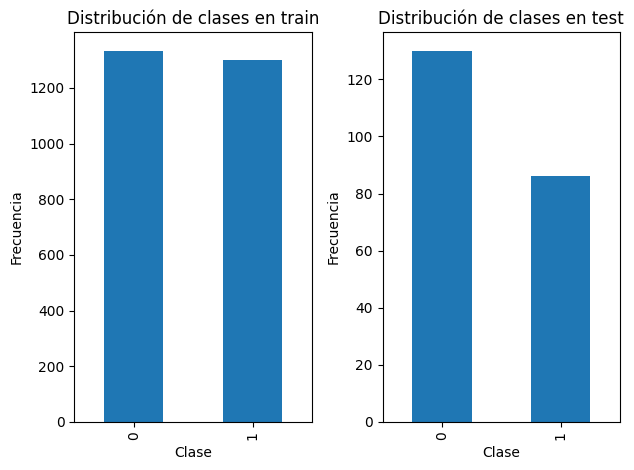

In [ ]:
# Histograma del conjunto de entrenamiento
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar')
plt.title('Distribución de clases en train')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Histograma del conjunto de prueba
plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar')
plt.title('Distribución de clases en test')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib
import numpy as np

# Cargar el modelo desde Google Drive
best_model = joblib.load('/content/drive/My Drive/modelos/mejor_modelo.pkl')

# Cargar las columnas seleccionadas desde Google Drive
selected_columns = np.load('/content/drive/My Drive/modelos/columnas_seleccionadas.npy', allow_pickle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Evaluar el mejor modelo en el conjunto de prueba
X_test_final = X_test[selected_columns]  # Asegurarse de usar las mismas columnas seleccionadas
y_pred_best = best_model.predict(X_test_final)
y_pred_proba_best = best_model.predict_proba(X_test_final)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Mejor modelo - Accuracy: {accuracy_best}, AUC: {auc_best}")
print("Ensemble de Modelos con SMOTE y Selección de Características")
print(f"Classification Report:\n{report_best}")

Mejor modelo - Accuracy: 0.7962962962962963, AUC: 0.8203935599284438
Ensemble de Modelos con SMOTE y Selección de Características
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       130
           1       0.76      0.71      0.73        86

    accuracy                           0.80       216
   macro avg       0.79      0.78      0.78       216
weighted avg       0.79      0.80      0.79       216



In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    # Seleccionar la primera instancia con etiqueta 0
    query_instance = X_test_final[y_test == 0].iloc[0:1]

    if query_instance.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance, total_CFs=900, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

        # Generar contrafactuales con DiCE utilizando el método aleatorio
        exp_random = Dice(d, m, method="random")
        dice_exp_random = exp_random.generate_counterfactuals(query_instance, total_CFs=900, desired_class="opposite")
        print("Contrafactuales generados por el método aleatorio:")
        dice_exp_random.visualize_as_dataframe(show_only_changes=True)
else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [21:06<00:00, 1266.02s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dice_ml/explainer_interfaces/dice_random.py:165: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_instance_df[self.data_interface.outcome_name] = \
100%|██████████| 1/1 [01:26<00:00, 86.37s/it]

Contrafactuales generados por el método aleatorio:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,6.591957811470006e-05,-,-,0.6,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
1,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
2,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
3,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
4,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
896,6.591957811470006e-05,1.0,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,0.1,-,-,-,-,-,1.0
897,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0
898,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Suponiendo que query_instance es un DataFrame que ya has definido y utilizado antes

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Para el contrafactual genético
query_instance_gen = query_instance.copy()
query_instance_gen['Label'] = 1

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_gen = max(df_cfs_list_gen[column_names].describe().iloc[-1])

print("Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label):", max_value_gen)

# Para el contrafactual aleatorio
json_str_random = dice_exp_random.to_json()  # Asegúrate de que dice_exp_random es la salida del método aleatorio
json_data_random = json.loads(json_str_random)
cfs_list_random = json_data_random['cfs_list'][0]
df_cfs_list_random = pd.DataFrame(cfs_list_random, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_random = max(df_cfs_list_random[column_names].describe().iloc[-1])

print("Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label):", max_value_random)

Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label): 1.0
Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label): 1.1


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas = df_cfs_list_gen.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen = df_cfs_list_gen.duplicated(subset=columnas_caracteristicas, keep=False)
num_duplicados_gen = duplicados_gen.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen}")

Número de duplicados en df_cfs_list_gen: 501


In [ ]:
# Filtrar solo las columnas de características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_random = df_cfs_list_random.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_random
duplicados_random = df_cfs_list_random.duplicated(subset=columnas_caracteristicas_random, keep=False)
num_duplicados_random = duplicados_random.sum()

print(f"Número de duplicados en df_cfs_list_random: {num_duplicados_random}")

Número de duplicados en df_cfs_list_random: 2


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen = df_cfs_list_gen.drop_duplicates(subset=columnas_caracteristicas)

# Mostrar el DataFrame limpio
df_cfs_list_gen

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Eliminar duplicados en df_cfs_list_random
df_cfs_list_random = df_cfs_list_random.drop_duplicates(subset=columnas_caracteristicas_random).reset_index(drop=True)

# Mostrar el DataFrame limpio
print(f"Número de contrafactuales después de eliminar duplicados: {len(df_cfs_list_random)}")
df_cfs_list_random

Número de contrafactuales después de eliminar duplicados: 899


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.6,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.000066,1.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0
896,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
897,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def add_oracle_column(df):
    # Crear la columna "oráculo" que será 1 si la suma de los valores de una fila (excluyendo la columna 'Label') es 1 o menos
    df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)
    return df

# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen = add_oracle_column(df_cfs_list_gen)
df_cfs_list_random = add_oracle_column(df_cfs_list_random)

# Imprimir los primeros registros para verificar
print("Contrafactual genético con la columna oráculo:")
print(df_cfs_list_gen.head())

print("\nContrafactual aleatorio con la columna oráculo:")
print(df_cfs_list_random.head())

Contrafactual genético con la columna oráculo:
   g__Bacteroides_H  g__Klebsiella_724518  g__Parvimonas  g__Fusobacterium_C  \
0               0.0                   0.0            0.0                 0.0   
1               0.0                   0.0            0.0                 0.0   
2               0.0                   0.0            0.0                 0.0   
3               0.0                   0.0            0.0                 0.0   
4               0.0                   0.0            0.0                 0.0   

   g__Pygmaiobacter  g__Erysipelatoclostridium  g__Bulleidia  \
0               0.0                        0.0           0.0   
1               0.0                        0.0           0.0   
2               0.0                        0.0           0.0   
3               0.0                        0.0           0.0   
4               0.0                        0.0           0.0   

   g__Enterococcus_H_360604  g__Holdemanella  g__Mediterraneibacter_A_155507  \
0      

In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen = df_cfs_list_gen['oráculo'].value_counts()

# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe aleatorio
count_random = df_cfs_list_random['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen)

print("\nConteo de valores en la columna 'oráculo' para el contrafactual aleatorio:")
print(count_random)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    471
0      6
Name: oráculo, dtype: int64

Conteo de valores en la columna 'oráculo' para el contrafactual aleatorio:
0    892
1      7
Name: oráculo, dtype: int64


In [ ]:
# Crear una copia del DataFrame df_cfs_list_gen para no modificarlo directamente
df_contrafactuales_gen = df_cfs_list_gen.copy()

# Seleccionar las columnas a la izquierda de 'label' (sin incluir 'label')
columnas_a_sumar = df_contrafactuales_gen.columns[:df_contrafactuales_gen.columns.get_loc('Label')]

# Calcular el valor mínimo de cada fila para las columnas seleccionadas
df_contrafactuales_gen['min_valor'] = df_contrafactuales_gen[columnas_a_sumar].min(axis=1)

# Calcular el valor máximo de cada fila para las columnas seleccionadas
df_contrafactuales_gen['max_valor'] = df_contrafactuales_gen[columnas_a_sumar].max(axis=1)

# Contar el número de elementos que son 0 por fila en las columnas seleccionadas
df_contrafactuales_gen['num_elementos_cero'] = (df_contrafactuales_gen[columnas_a_sumar] == 0).sum(axis=1)

# Calcular la suma de las proporciones de cada fila para las columnas seleccionadas
df_contrafactuales_gen['suma_proporciones'] = df_contrafactuales_gen[columnas_a_sumar].sum(axis=1)

# Mostrar el DataFrame con las nuevas columnas
df_contrafactuales_gen.head()

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.0,0.2,495,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.0,0.2,496,0.3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.0,0.3,495,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.0,0.2,495,0.4


In [ ]:
min(df_contrafactuales_gen['min_valor'])

0.0

In [ ]:
df_contrafactuales_gen[['max_valor','num_elementos_cero','suma_proporciones']].describe()

,max_valor,num_elementos_cero,suma_proporciones
count,477.000000,477.000000,477.000000
mean,0.231237,495.788260,0.372327
std,0.145121,1.026553,0.217098
min,0.000000,491.000000,0.000000
25%,0.100000,496.000000,0.200000
50%,0.200000,496.000000,0.300000
75%,0.300000,496.000000,0.500000
max,1.000000,498.000000,1.600000


In [ ]:
# Eliminar las filas donde la suma de las proporciones es mayor que 1
df_contrafactuales_gen = df_contrafactuales_gen[df_contrafactuales_gen['suma_proporciones'] <= 1]

# Resetear el índice del DataFrame (opcional, para mantener un índice limpio)
df_contrafactuales_gen.reset_index(drop=True, inplace=True)

df_contrafactuales_gen[['max_valor','num_elementos_cero','suma_proporciones']].describe()

,max_valor,num_elementos_cero,suma_proporciones
count,471.000000,471.000000,471.000000
mean,0.225265,495.821656,0.360722
std,0.134080,0.977425,0.191096
min,0.000000,491.000000,0.000000
25%,0.100000,496.000000,0.200000
50%,0.200000,496.000000,0.300000
75%,0.300000,496.000000,0.500000
max,1.000000,498.000000,1.000000


In [ ]:
import numpy as np

def dist_cont_without_mad(c, x):
    """
    Calcula la distancia dist_cont entre el contrafactual c y la instancia original x,
    excluyendo la columna 'Label' y sin usar la MAD.

    Parameters:
    - c: Serie o array con los valores del contrafactual.
    - x: Serie o array con los valores de la instancia original.

    Returns:
    - Distancia normalizada dist_cont sin MAD.
    """
    # Excluir la columna 'Label' si está presente
    c = c.drop('Label', errors='ignore')
    x = x.drop('Label', errors='ignore')

    # Número de características
    d_cont = len(c)

    # Calcular la distancia
    dist = np.sum(np.abs(c - x)) / d_cont
    return dist

# Supongamos que `query_instance` es la instancia original y ya la tienes definida
# Asegúrate de que `query_instance` sea una Serie, no un DataFrame o matriz
query_instance = query_instance.squeeze()  # Esto convierte `query_instance` a una Serie si no lo es

# Añadir una columna al DataFrame `df_contrafactuales_gen` con la distancia a la instancia original
df_contrafactuales_gen['distancia'] = df_contrafactuales_gen.apply(
    lambda c: dist_cont_without_mad(c, query_instance),
    axis=1
)

# Mostrar el DataFrame con la nueva columna de distancias
df_contrafactuales_gen.head()

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.2,495,0.5,0.002186
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.2,496,0.3,0.002186
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.3,495,0.5,0.002583
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.2,495,0.4,0.002384


In [ ]:
# Ordenar el DataFrame de menor a mayor según la columna 'distancia_a_instancia'
df_ordenado = df_contrafactuales_gen.sort_values(by='distancia')

# Crear un nuevo DataFrame con los 100 primeros registros
df_top_100 = df_ordenado.head(100)

# Mostrar los primeros registros del nuevo DataFrame para ver el resultado
df_top_100

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.2,495,0.4,0.001987
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.0,498,0.0,0.001987
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0,1.0,1,0.0,0.1,496,0.2,0.002384
404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.002384
406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.002384
464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.002384


In [ ]:
def find_out_of_bounds_multiple(df_contrafactuales, X_train, cf_name_prefix="Contrafactual"):
    """
    Identifica las características que están fuera del rango (mínimo y máximo)
    en los datos de entrenamiento para múltiples contrafactuales y calcula la desviación,
    considerando solo las columnas a la izquierda de 'Label'.

    Parameters:
    - df_contrafactuales: DataFrame con los contrafactuales.
    - X_train: DataFrame con los datos de entrenamiento.
    - cf_name_prefix: Prefijo del nombre de los contrafactuales (para identificar en la salida).

    Returns:
    - Lista de diccionarios, uno por cada contrafactual, con las características fuera de rango y sus desviaciones.
    """
    # Obtener las columnas que están a la izquierda de 'Label' (sin incluir 'Label')
    columnas_a_calcular = df_contrafactuales.columns[:df_contrafactuales.columns.get_loc('Label')]

    # Obtener los valores mínimos y máximos en X_train para estas columnas
    min_values = X_train[columnas_a_calcular].min()
    max_values = X_train[columnas_a_calcular].max()

    all_out_of_bounds = []

    for idx, counterfactual in df_contrafactuales.iterrows():
        out_of_bounds = {}

        for feature in columnas_a_calcular:
            cf_value = counterfactual[feature]
            if cf_value < min_values[feature]:
                deviation = cf_value - min_values[feature]
                out_of_bounds[feature] = deviation
            elif cf_value > max_values[feature]:
                deviation = cf_value - max_values[feature]
                out_of_bounds[feature] = deviation

        if out_of_bounds:
            cf_name = f"{cf_name_prefix} {idx + 1}"
            print(f"{cf_name} - Características fuera del rango y sus desviaciones:")
            for feature, deviation in out_of_bounds.items():
                print(f"{feature}: Desviación de {deviation}")
            print("-" * 50)

        all_out_of_bounds.append(out_of_bounds)

    return all_out_of_bounds

# Aplicar la función a los 100 contrafactuales, considerando las columnas a la izquierda de 'Label'
out_of_bounds_results = find_out_of_bounds_multiple(df_top_100, X_train_final, "Contrafactual")

Contrafactual 12 - Características fuera del rango y sus desviaciones:
g__Clostridioides_A: Desviación de 0.017569585359317005
--------------------------------------------------
Contrafactual 1 - Características fuera del rango y sus desviaciones:
g__UBA6398: Desviación de 0.04841972187104931
--------------------------------------------------
Contrafactual 130 - Características fuera del rango y sus desviaciones:
g__Brevibacillus_D: Desviación de 0.0013550135501355087
--------------------------------------------------
Contrafactual 35 - Características fuera del rango y sus desviaciones:
g__Brevibacillus_D: Desviación de 0.0013550135501355087
--------------------------------------------------
Contrafactual 93 - Características fuera del rango y sus desviaciones:
g__UBA6398: Desviación de 0.04841972187104931
--------------------------------------------------
Contrafactual 131 - Características fuera del rango y sus desviaciones:
g__Brevibacillus_D: Desviación de 0.0013550135501355087
g_

In [ ]:
def count_out_of_bounds_features(df_contrafactuales, X_train):
    """
    Cuenta cuántos contrafactuales tienen cada característica fuera del rango (mínimo y máximo)
    en los datos de entrenamiento, calcula la máxima desviación para cada característica,
    y añade el valor máximo permitido en el conjunto de entrenamiento,
    considerando solo las columnas a la izquierda de 'Label'.

    Parameters:
    - df_contrafactuales: DataFrame con los contrafactuales.
    - X_train: DataFrame con los datos de entrenamiento.

    Returns:
    - Un DataFrame con el conteo de cuántos contrafactuales tienen cada característica fuera de rango,
      la máxima desviación de cada característica y el valor máximo permitido en el entrenamiento.
    """
    # Obtener las columnas que están a la izquierda de 'Label' (sin incluir 'Label')
    columnas_a_calcular = df_contrafactuales.columns[:df_contrafactuales.columns.get_loc('Label')]

    # Obtener los valores mínimos y máximos en X_train para estas columnas
    min_values = X_train[columnas_a_calcular].min()
    max_values = X_train[columnas_a_calcular].max()

    # Inicializar diccionarios para contar las ocurrencias fuera de rango y almacenar la máxima desviación
    out_of_bounds_count = {feature: 0 for feature in columnas_a_calcular}
    max_deviation = {feature: 0 for feature in columnas_a_calcular}

    for _, counterfactual in df_contrafactuales.iterrows():
        for feature in columnas_a_calcular:
            cf_value = counterfactual[feature]
            if cf_value < min_values[feature]:
                deviation = min_values[feature] - cf_value
                out_of_bounds_count[feature] += 1
                if deviation > max_deviation[feature]:
                    max_deviation[feature] = deviation
            elif cf_value > max_values[feature]:
                deviation = cf_value - max_values[feature]
                out_of_bounds_count[feature] += 1
                if deviation > max_deviation[feature]:
                    max_deviation[feature] = deviation

    # Convertir los diccionarios en un DataFrame para mejor visualización
    out_of_bounds_df = pd.DataFrame({
        'Característica': list(out_of_bounds_count.keys()),
        'Número de Contrafactuales Fuera de Rango': list(out_of_bounds_count.values()),
        'Máxima Desviación': list(max_deviation.values()),
        'Valor Máximo Permitido': max_values.values
    })

    # Ordenar el DataFrame por el número de contrafactuales fuera de rango, de mayor a menor
    out_of_bounds_df = out_of_bounds_df.sort_values(by='Número de Contrafactuales Fuera de Rango', ascending=False)

    return out_of_bounds_df

# Aplicar la función a los 100 contrafactuales
out_of_bounds_summary = count_out_of_bounds_features(df_top_100, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary.head(13)  # Mostrar las 5 características más frecuentes fuera de rango

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
275,g__Brevibacillus_D,22,0.001355,0.098645
353,g__UBA6398,4,0.048420,0.051580
289,g__CAG-603,1,0.025644,0.074356
281,g__Stomatobaculum,1,0.021610,0.078390
203,g__Clostridioides_A,1,0.017570,0.082430
303,g__UBA3263,1,0.022114,0.077886
151,g__CAG-1031,1,0.015932,0.084068
137,g__Sellimonas,1,0.037384,0.062616
243,g__JC017,1,0.015756,0.084244
118,g__Alistipes_A_871404,1,0.022619,0.077381


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_top_100_filtrado = df_top_100.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_filtrado.columns.difference(['Label', 'oráculo', 'min_valor', 'max_valor',
                                                                   'num_elementos_cero', 'suma_proporciones',
                                                                   'distancia', 'proximidad', 'diversidad_individual',
                                                                   'métrica_combinada'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_50 = max_values * 1.5

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_top_100_filtrado = df_top_100_filtrado[~(df_top_100_filtrado[columnas_caracteristicas] > limites_50).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_top_100_filtrado)}")
df_top_100_filtrado

Total de contrafactuales después de filtrar: 95


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.2,495,0.4,0.001987
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.0,498,0.0,0.001987
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.001987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0,1.0,1,0.0,0.1,496,0.2,0.002384
404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.002384
406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.002384
464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0.0,0.1,496,0.2,0.002384


In [ ]:
# Calcular la proximidad promedio utilizando la columna 'proximidad'
proximidad_promedio = df_top_100_filtrado['distancia'].mean()

# Mostrar la proximidad promedio
print(f"La proximidad promedio del grupo es: {proximidad_promedio}")

La proximidad promedio del grupo es: 0.002274411677939162


In [ ]:
import numpy as np
from itertools import combinations

def calcular_diversidad(df_contrafactuales):
    """
    Calcula la diversidad de un conjunto de contrafactuales como la media de las distancias
    entre todos los pares de contrafactuales.

    Parameters:
    - df_contrafactuales: DataFrame con los contrafactuales.

    Returns:
    - Diversidad del conjunto de contrafactuales.
    """
    k = len(df_contrafactuales)

    if k < 2:
        return 0  # No hay pares para comparar si hay menos de 2 contrafactuales

    # Inicializar la suma de las distancias
    sum_distances = 0

    # Generar todas las combinaciones de pares (i, j) con i < j
    for (i, j) in combinations(range(k), 2):
        ci = df_contrafactuales.iloc[i]
        cj = df_contrafactuales.iloc[j]
        dist_ij = dist_cont_without_mad(ci, cj)
        sum_distances += dist_ij

    # Número de combinaciones de pares (kC2)
    num_pairs = k * (k - 1) / 2

    # Calcular la diversidad como la media de las distancias
    diversidad = sum_distances / num_pairs

    return diversidad

In [ ]:
diversidad_total = calcular_diversidad(df_top_100_filtrado)
print(f"La diversidad del conjunto de contrafactuales es: {diversidad_total}")

La diversidad del conjunto de contrafactuales es: 0.0023015611812859213


In [ ]:
def calcular_esparsidad(df_contrafactuales, instancia_original):
    """
    Calcula la esparsidad de un conjunto de contrafactuales basado en la fórmula dada.

    Parameters:
    - df_contrafactuales: DataFrame con los contrafactuales.
    - instancia_original: Serie con la instancia original.

    Returns:
    - Esparsidad del conjunto de contrafactuales.
    """
    k = len(df_contrafactuales)  # Número de contrafactuales
    d = len(instancia_original)  # Número de características

    if k == 0 or d == 0:
        return 1  # Si no hay contrafactuales o no hay características, la esparsidad es máxima

    # Asegurarse de que los índices de `instancia_original` coincidan con los de los contrafactuales
    instancia_original = instancia_original.reindex(df_contrafactuales.columns)

    # Inicializar el contador de diferencias
    sum_differences = 0

    # Contar cuántas características difieren entre cada contrafactual y la instancia original
    for i, cf in df_contrafactuales.iterrows():
        sum_differences += (cf != instancia_original).sum()

    # Calcular la esparsidad
    esparsidad = 1 - (sum_differences / (k * d))

    return esparsidad

In [ ]:
esparsidad_total = calcular_esparsidad(df_top_100_filtrado, query_instance)
print(f"La esparsidad del conjunto de contrafactuales es: {esparsidad_total}")

La esparsidad del conjunto de contrafactuales es: 0.8627562883111393


In [ ]:
import numpy as np

def calcular_diversidad_individual(counterfactual, df_contrafactuales, num_features):
    """
    Calcula la diversidad de un contrafactual como la suma de las distancias de este
    contrafactual a cada uno de los otros contrafactuales en el conjunto,
    dividido entre el número de características menos uno.

    Parameters:
    - counterfactual: Serie con los valores del contrafactual.
    - df_contrafactuales: DataFrame con los demás contrafactuales.
    - num_features: Número total de características.

    Returns:
    - Diversidad del contrafactual.
    """
    sum_distances = 0

    for _, other_cf in df_contrafactuales.iterrows():
        dist = dist_cont_without_mad(counterfactual, other_cf)
        sum_distances += dist

    # Calcular la diversidad
    diversidad = sum_distances / (num_features - 1)
    return diversidad

In [ ]:
# Obtener el número de características (sin contar 'Label')
num_features = df_contrafactuales_gen.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_contrafactuales_gen['proximidad'] = df_contrafactuales_gen.apply(
    lambda c: dist_cont_without_mad(c, query_instance),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_contrafactuales_gen['diversidad_individual'] = df_contrafactuales_gen.apply(
    lambda c: calcular_diversidad_individual(c, df_contrafactuales_gen.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_contrafactuales_gen['métrica_combinada'] = -df_contrafactuales_gen['diversidad_individual'] + 0.5 * df_contrafactuales_gen['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_contrafactuales_gen.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores.head()

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia,proximidad,diversidad_individual,métrica_combinada
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,491,0.9,0.002583,0.002578,0.012520,-0.011231
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,491,0.9,0.002978,0.002972,0.012469,-0.010983
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,491,0.9,0.003141,0.003135,0.012442,-0.010875
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.4,492,1.0,0.003177,0.003171,0.011202,-0.009617
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,492,1.0,0.003149,0.003143,0.011017,-0.009445


In [ ]:
out_of_bounds_results_mejores = find_out_of_bounds_multiple(df_top_100_mejores, X_train_final, "Contrafactual")

Contrafactual 10 - Características fuera del rango y sus desviaciones:
g__Butyribacter: Desviación de 0.0252
g__Vescimonas: Desviación de 0.003760051553613003
--------------------------------------------------
Contrafactual 128 - Características fuera del rango y sus desviaciones:
g__Treponema_D: Desviación de 0.0062140391254316
g__Rhodococcus_C_375578: Desviación de 0.0369195046439629
g__Brevibacillus_D: Desviación de 0.0013550135501355087
--------------------------------------------------
Contrafactual 11 - Características fuera del rango y sus desviaciones:
g__Brevibacillus_D: Desviación de 0.0013550135501355087
--------------------------------------------------
Contrafactual 451 - Características fuera del rango y sus desviaciones:
g__Brevibacillus_D: Desviación de 0.0013550135501355087
--------------------------------------------------
Contrafactual 127 - Características fuera del rango y sus desviaciones:
g__Anaerococcus: Desviación de 0.0234712559502014
g__Stomatobaculum: Desvia

In [ ]:
# Aplicar la función a los 100 contrafactuales
out_of_bounds_summary_mejores = count_out_of_bounds_features(df_top_100_mejores, X_train_final)

# Mostrar el resumen de características fuera de rango y el número de contrafactuales afectados
out_of_bounds_summary_mejores.head(24)  # Mostrar las 10 características más frecuentes fuera de rango

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
275,g__Brevibacillus_D,21,0.001355,0.098645
353,g__UBA6398,5,0.048420,0.051580
281,g__Stomatobaculum,3,0.021610,0.078390
118,g__Alistipes_A_871404,2,0.022619,0.077381
255,g__Vescimonas,2,0.003760,0.196240
259,g__Fenollaria,2,0.027200,0.072800
303,g__UBA3263,2,0.022114,0.077886
146,g__Anaerococcus,2,0.023471,0.076529
159,g__Aggregatibacter_736122,1,0.015378,0.184622
92,g__Coprococcus_A_121497,1,0.020060,0.079940


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_top_100_mejores_filtrado = df_top_100_mejores.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_filtrado.columns.difference(['Label', 'oráculo', 'min_valor', 'max_valor',
                                                                   'num_elementos_cero', 'suma_proporciones',
                                                                   'distancia', 'proximidad', 'diversidad_individual',
                                                                   'métrica_combinada'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_50 = max_values * 1.5

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_top_100_mejores_filtrado = df_top_100_mejores_filtrado[~(df_top_100_mejores_filtrado[columnas_caracteristicas] > limites_50).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_top_100_mejores_filtrado)}")
df_top_100_mejores_filtrado

Total de contrafactuales después de filtrar: 90


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia,proximidad,diversidad_individual,métrica_combinada
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,491,0.9,0.002583,0.002578,0.012520,-0.011231
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,491,0.9,0.002978,0.002972,0.012469,-0.010983
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.4,492,1.0,0.003177,0.003171,0.011202,-0.009617
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,492,1.0,0.003149,0.003143,0.011017,-0.009445
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.3,492,1.0,0.003572,0.003565,0.010983,-0.009201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,497,0.1,0.002186,0.002181,0.003805,-0.002714
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,497,0.1,0.002186,0.002181,0.003805,-0.002714
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,497,0.1,0.002186,0.002181,0.003805,-0.002714
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,497,0.1,0.002186,0.002181,0.003805,-0.002714


In [ ]:
# Número de contrafactuales que ya tienes
num_actuales = len(df_top_100_mejores_filtrado)

# Iniciar desde el contrafactual número 101 en df_ordenado_por_métrica
df_candidatos = df_ordenado_por_métrica.iloc[100:]

# Filtrar y añadir contrafactuales hasta alcanzar 99
for idx, row in df_candidatos.iterrows():
    # Verificar si este contrafactual cumple con la condición del 50% adicional del límite
    if not (row[columnas_caracteristicas] > limites_50).any():
        df_top_100_mejores_filtrado = df_top_100_mejores_filtrado.append(row, ignore_index=True)
        num_actuales += 1
        # Si alcanzamos 95 contrafactuales, detener el proceso
        if num_actuales == 95:
            break

# Mostrar el DataFrame final con 95 contrafactuales
df_top_100_mejores_filtrado = df_top_100_mejores_filtrado.reset_index(drop=True)
print(f"Total de contrafactuales después de completar: {len(df_top_100_mejores_filtrado)}")
df_top_100_mejores_filtrado

Total de contrafactuales después de completar: 95


<ipython-input-36-7abda33634cd>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_100_mejores_filtrado = df_top_100_mejores_filtrado.append(row, ignore_index=True)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia,proximidad,diversidad_individual,métrica_combinada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,491.0,0.9,0.002583,0.002578,0.012520,-0.011231
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,491.0,0.9,0.002978,0.002972,0.012469,-0.010983
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.4,492.0,1.0,0.003177,0.003171,0.011202,-0.009617
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,492.0,1.0,0.003149,0.003143,0.011017,-0.009445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.3,492.0,1.0,0.003572,0.003565,0.010983,-0.009201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.1,497.0,0.1,0.002186,0.002181,0.003803,-0.002712
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.1,497.0,0.1,0.002186,0.002181,0.003803,-0.002712
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,495.0,0.4,0.002384,0.002379,0.003901,-0.002712
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.1,497.0,0.1,0.002186,0.002181,0.003802,-0.002711


In [ ]:
# Calcular la proximidad promedio utilizando la columna 'proximidad'
proximidad_promedio = df_top_100_mejores_filtrado['distancia'].mean()

# Mostrar la proximidad promedio
print(f"La proximidad promedio del grupo es: {proximidad_promedio}")

La proximidad promedio del grupo es: 0.002683874548221201


In [ ]:
diversidad_total = calcular_diversidad(df_top_100_mejores_filtrado)
print(f"La diversidad del conjunto de contrafactuales es: {diversidad_total}")

La diversidad del conjunto de contrafactuales es: 0.006742787046584439


In [ ]:
esparsidad_total = calcular_esparsidad(df_top_100_mejores_filtrado, query_instance)
print(f"La esparsidad del conjunto de contrafactuales es: {esparsidad_total}")

La esparsidad del conjunto de contrafactuales es: 0.8555273726484887


In [ ]:
import pandas as pd

# Suponiendo que df_top_100_mejores_filtrado es el DataFrame con los contrafactuales
# y query_instance es la instancia original

# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_filtrado.columns.difference(['Label', 'oráculo', 'min_valor', 'max_valor',
                                                                           'num_elementos_cero', 'suma_proporciones',
                                                                           'distancia', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_filtrado[columnas_caracteristicas] != query_instance[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Paso 4: Calcular la proporción de cambios
proporciones = conteo_cambios / len(df_top_100_mejores_filtrado)

# Mostrar la importancia de cada característica
importancia_caracteristicas = pd.DataFrame({'Característica': columnas_caracteristicas, 'Importancia': proporciones})
print(importancia_caracteristicas.sort_values(by='Importancia', ascending=False))

                                  Característica  Importancia
g__Ruminococcus_D              g__Ruminococcus_D          1.0
g__Clostridium_A                g__Clostridium_A          1.0
g__Christensenella            g__Christensenella          1.0
g__Catenibacterium            g__Catenibacterium          1.0
g__Scatomonas                      g__Scatomonas          1.0
...                                          ...          ...
g__Eubacterium_O_258270  g__Eubacterium_O_258270          0.0
g__Eubacterium_M                g__Eubacterium_M          0.0
g__Eubacterium_G                g__Eubacterium_G          0.0
g__Eubacterium_F                g__Eubacterium_F          0.0
g__Zag111                              g__Zag111          0.0

[498 rows x 2 columns]


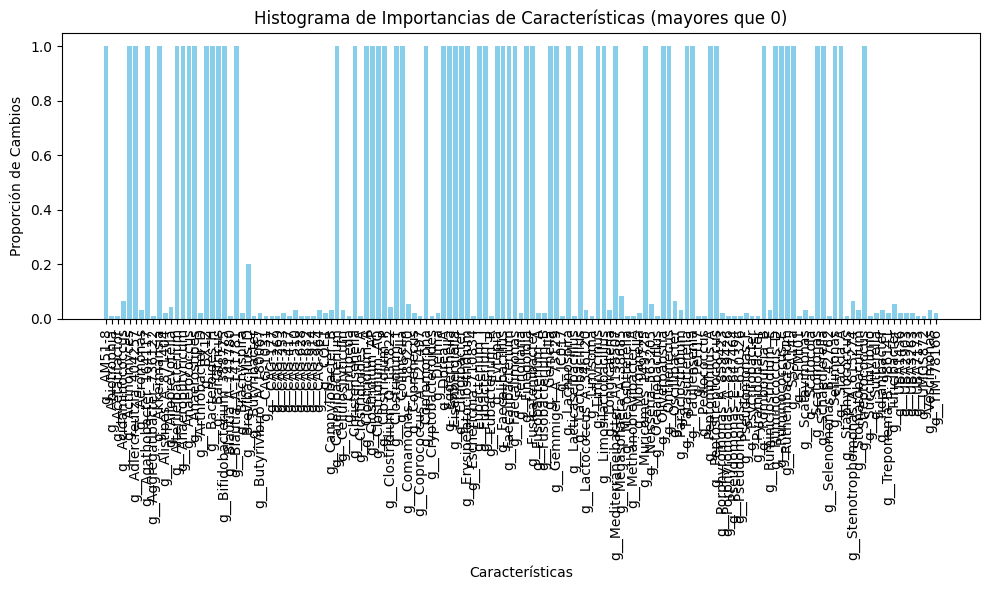

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las importancias mayores que 0
importancias_mayores_que_cero = importancia_caracteristicas[importancia_caracteristicas['Importancia'] > 0]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(importancias_mayores_que_cero['Característica'], importancias_mayores_que_cero['Importancia'], color='skyblue')
plt.xlabel('Características')
plt.ylabel('Proporción de Cambios')
plt.title('Histograma de Importancias de Características (mayores que 0)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

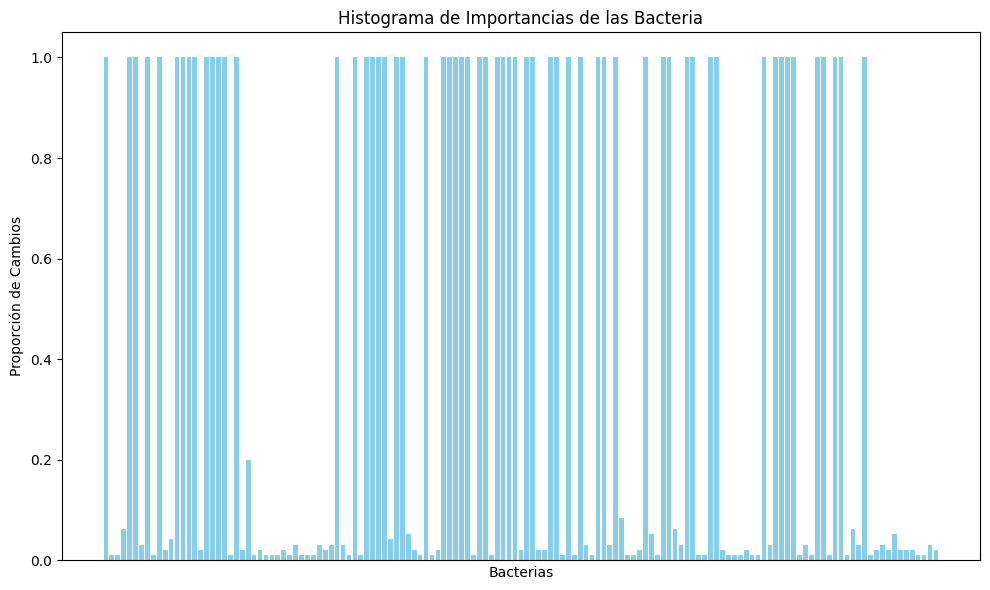

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las importancias mayores que 0
importancias_mayores_que_cero = importancia_caracteristicas[importancia_caracteristicas['Importancia'] > 0]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(importancias_mayores_que_cero['Característica'], importancias_mayores_que_cero['Importancia'], color='skyblue')
plt.xlabel('Bacterias')
plt.ylabel('Proporción de Cambios')
plt.title('Histograma de Importancias de las Bacteria')
plt.xticks([], [])  # Esto elimina las etiquetas del eje x
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar las características con importancia igual a 1
bacterias_importancia_1 = importancia_caracteristicas[importancia_caracteristicas['Importancia'] == 1]

# Contar cuántas bacterias tienen importancia igual a 1
num_bacterias_importancia_1 = len(bacterias_importancia_1)

print(f"Número de bacterias con importancia igual a 1: {num_bacterias_importancia_1}")

Número de bacterias con importancia igual a 1: 60


In [ ]:
# Filtrar las características con importancia distinta de 1
importancias_distintas_de_1 = importancia_caracteristicas[importancia_caracteristicas['Importancia'] != 1]

# Encontrar el valor máximo de las importancias distintas de 1
max_importancia_distinta_de_1 = importancias_distintas_de_1['Importancia'].max()

print(f"El máximo de las importancias distintas de 1 es: {max_importancia_distinta_de_1}")

El máximo de las importancias distintas de 1 es: 0.2


In [ ]:
import pandas as pd

# Paso 1: Filtrar las características con importancia igual a 1
bacterias_importancia_1 = importancia_caracteristicas[importancia_caracteristicas['Importancia'] == 1]['Característica']

# Paso 2: Calcular el cambio promedio para cada una de estas bacterias
cambios_medios = {}

for bacteria in bacterias_importancia_1:
    # Calcular la diferencia absoluta entre los valores de los contrafactuales y la instancia original
    diferencia = (df_top_100_mejores_filtrado[bacteria] - query_instance[bacteria]).abs()
    # Calcular el promedio de las diferencias
    cambio_medio = diferencia.mean()
    cambios_medios[bacteria] = cambio_medio

# Paso 3: Crear un DataFrame con las bacterias y sus cambios medios
df_cambios_medios = pd.DataFrame(list(cambios_medios.items()), columns=['Bacteria', 'Cambio Medio'])

# Mostrar el DataFrame resultante
print(df_cambios_medios)

                          Bacteria  Cambio Medio
0                        g__AM51-8      0.001117
1                   g__Actinomyces      0.000066
2          g__Adlercreutzia_404257      0.002736
3           g__Agathobacter_164117      0.021259
4                   g__Akkermansia      0.093875
5            g__Alterileibacterium      0.000165
6               g__Anaerobutyricum      0.081881
7                  g__Anaerococcus      0.003337
8                  g__Anaerostipes      0.000659
9                          g__BX12      0.001483
10                g__Bacteroides_H      0.000066
11                  g__Bariatricus      0.014931
12       g__Bifidobacterium_388775      0.000527
13             g__Blautia_A_141781      0.226170
14              g__Catenibacterium      0.009655
15              g__Christensenella      0.000099
16                g__Clostridium_A      0.004860
17               g__Clostridium_AP      0.013777
18               g__Clostridium_AQ      0.001384
19                g_

In [ ]:
# Ordenar el DataFrame de mayor a menor por la columna 'Cambio Medio'
df_cambios_medios_ordenado = df_cambios_medios.sort_values(by='Cambio Medio', ascending=False)

# Mostrar el DataFrame ordenado
df_cambios_medios_ordenado

,Bacteria,Cambio Medio
21,g__Collinsella,0.402975
13,g__Blautia_A_141781,0.226170
4,g__Akkermansia,0.093875
6,g__Anaerobutyricum,0.081881
52,g__Ruminococcus_E,0.029235
19,g__Clostridium_P,0.025321
23,g__Dorea_A,0.022314
3,g__Agathobacter_164117,0.021259
59,g__Streptococcus,0.020633
39,g__Lactobacillus,0.016893


# **MAL**

In [ ]:
# Verificar duplicados en df_top_100_filtrado
duplicados_filtrado = df_top_100_filtrado.duplicated(subset=columnas_caracteristicas, keep=False)
num_duplicados_filtrado = duplicados_filtrado.sum()

print(f"Número de duplicados en df_top_100_filtrado: {num_duplicados_filtrado}")
if num_duplicados_filtrado > 0:
    print("Duplicados en df_top_100_filtrado:")
    print(df_top_100_filtrado[duplicados_filtrado])

# Verificar duplicados en df_top_100_mejores_filtrado
duplicados_mejores = df_top_100_mejores_filtrado.duplicated(subset=columnas_caracteristicas, keep=False)
num_duplicados_mejores = duplicados_mejores.sum()

print(f"Número de duplicados en df_top_100_mejores_filtrado: {num_duplicados_mejores}")
if num_duplicados_mejores > 0:
    print("Duplicados en df_top_100_mejores_filtrado:")
    print(df_top_100_mejores_filtrado[duplicados_mejores])

Número de duplicados en df_top_100_filtrado: 0
Número de duplicados en df_top_100_mejores_filtrado: 0


In [ ]:
import pandas as pd

# Concatenar los DataFrames
df_combined = pd.concat([df_top_100_filtrado, df_top_100_mejores_filtrado])

# Definir las columnas a usar para identificar duplicados
# Estas deberían ser las columnas que representan las características del contrafactual
columnas_caracteristicas = df_combined.columns.difference(['Label', 'oráculo', 'min_valor', 'max_valor',
                                                           'num_elementos_cero', 'suma_proporciones',
                                                           'distancia', 'proximidad', 'diversidad_individual',
                                                           'métrica_combinada'])

# Eliminar duplicados basado solo en esas columnas
df_combined = df_combined.drop_duplicates(subset=columnas_caracteristicas).reset_index(drop=True)

# Mostrar el DataFrame final
df_combined

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia,proximidad,diversidad_individual,métrica_combinada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,495.0,0.4,0.001987,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,498.0,0.0,0.001987,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.1,496.0,0.2,0.001987,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.1,496.0,0.2,0.001987,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.1,496.0,0.2,0.001987,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,495.0,0.5,0.002583,0.002578,0.004092,-0.002803
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,495.0,0.5,0.002981,0.002975,0.004265,-0.002778
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.2,495.0,0.5,0.002981,0.002975,0.004256,-0.002769
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.3,495.0,0.5,0.002965,0.002960,0.004223,-0.002744


In [ ]:
# Verificar duplicados en df_top_100_mejores_filtrado
duplicados_mejores2 = df_combined.duplicated(subset=columnas_caracteristicas, keep=False)
num_duplicados_mejores2 = duplicados_mejores2.sum()

print(f"Número de duplicados en df_top_100_mejores_filtrado: {num_duplicados_mejores2}")

Número de duplicados en df_top_100_mejores_filtrado: 0


In [ ]:
# Calcular la proximidad promedio utilizando la columna 'proximidad'
proximidad_promedio = df_combined['distancia'].mean()

# Mostrar la proximidad promedio
print(f"La proximidad promedio del grupo es: {proximidad_promedio}")

La proximidad promedio del grupo es: 0.0025410999441756624


In [ ]:
diversidad_total = calcular_diversidad(df_combined)
print(f"La diversidad del conjunto de contrafactuales es: {diversidad_total}")

La diversidad del conjunto de contrafactuales es: 0.005366524898515243


In [ ]:
esparsidad_total = calcular_esparsidad(df_combined, query_instance)
print(f"La esparsidad del conjunto de contrafactuales es: {esparsidad_total}")

La esparsidad del conjunto de contrafactuales es: 0.8558821272350549


**Hasta aquí**

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Distancia personalizada (ya definida)
def dist_cont_without_mad(c, x):
    c = c.drop('Label', errors='ignore')
    x = x.drop('Label', errors='ignore')
    d_cont = len(c)
    dist = np.sum(np.abs(c - x)) / d_cont
    return dist

# Calcular proximidad usando la función dist_cont_without_mad
def calcular_proximidad(df_contrafactuales, x_original):
    distancias = df_contrafactuales.apply(lambda c: dist_cont_without_mad(c, x_original), axis=1)
    return distancias.mean()

# Nueva función de diversidad basada en la suma de distancias de pares
def calcular_diversidad(df_contrafactuales):
    k = len(df_contrafactuales)
    if k < 2:
        return 0  # Si hay menos de 2 contrafactuales, no hay diversidad

    # Calcular la matriz de distancias
    dist_matrix = squareform(pdist(df_contrafactuales, metric='euclidean'))

    # Sumar las distancias para todos los pares (i, j) con i < j
    sum_distances = np.sum([dist_matrix[i, j] for i in range(k-1) for j in range(i+1, k)])

    # Número de combinaciones de pares (kC2)
    num_pairs = k * (k - 1) / 2

    # Calcular diversidad
    diversidad = sum_distances / num_pairs
    return diversidad

# Seleccionar 100 contrafactuales que minimicen la función objetivo
def seleccionar_contrafactuales(df_contrafactuales, x_original, lambda_1=0.5, lambda_2=1.0, n=100):
    mejores_contrafactuales = df_contrafactuales.sample(n)  # Para asegurarnos de que siempre haya un retorno
    mejor_objetivo = float('inf')

    for _ in range(1000):  # Número de intentos
        muestra = df_contrafactuales.sample(n)
        proximidad = calcular_proximidad(muestra, x_original)
        diversidad = calcular_diversidad(muestra.drop(columns=['Label'], errors='ignore').values)

        objetivo = -lambda_2 * diversidad + lambda_1 * proximidad

        # Asegurándonos de que `objetivo` sea un valor escalar antes de compararlo
        if isinstance(objetivo, (int, float)) and objetivo < mejor_objetivo:
            mejor_objetivo = objetivo
            mejores_contrafactuales = muestra

    return mejores_contrafactuales

mejores_contrafactuales = seleccionar_contrafactuales(df_contrafactuales_gen, query_instance)

# Mostrar los mejores contrafactuales seleccionados
mejores_contrafactuales

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,Label,oráculo,min_valor,max_valor,num_elementos_cero,suma_proporciones,distancia,proximidad,diversidad_individual,métrica_combinada
372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,496,0.3,0.002583,0.002578,0.002494,-0.001205
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,492,0.7,0.002346,0.002341,0.010000,-0.008829
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,496,0.2,0.002382,0.002377,0.002422,-0.001233
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,496,0.2,0.002384,0.002380,0.002439,-0.001249
466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.3,496,0.5,0.002981,0.002975,0.003082,-0.001595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,497,0.1,0.002186,0.002181,0.003792,-0.002702
273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.1,496,0.2,0.002384,0.002380,0.002443,-0.001253
463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.4,496,0.5,0.002981,0.002975,0.002984,-0.001496
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,0.2,493,0.7,0.002578,0.002573,0.008178,-0.006891


In [ ]:
# Calcular la proximidad promedio utilizando la columna 'proximidad'
proximidad_promedio = mejores_contrafactuales['distancia'].mean()

# Mostrar la proximidad promedio
print(f"La proximidad promedio del grupo es: {proximidad_promedio}")

La proximidad promedio del grupo es: 0.0026406635991565418


In [ ]:
diversidad_total = calcular_diversidad(mejores_contrafactuales)
print(f"La diversidad del conjunto de contrafactuales es: {diversidad_total}")

La diversidad del conjunto de contrafactuales es: 1.461524909967913


In [ ]:
esparsidad_total = calcular_esparsidad(df_combined, query_instance)
print(f"La esparsidad del conjunto de contrafactuales es: {esparsidad_total}")

La esparsidad del conjunto de contrafactuales es: 0.8558821272350549
